<a href="https://colab.research.google.com/github/iamabd53/Live-Class-Monitoring-System/blob/main/Live_Class_Monitoring_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Introduction
The Indian education landscape has been undergoing rapid changes for the past 10 years owing to
the advancement of web-based learning services, specifically, eLearning platforms.
Global E-learning is estimated to witness an 8X over the next 5 years to reach USD 2B in 2021. India
is expected to grow with a CAGR of 44% crossing the 10M users mark in 2021. Although the market
is growing on a rapid scale, there are major challenges associated with digital learning when
compared with brick and mortar classrooms. One of many challenges is how to ensure quality
learning for students. Digital platforms might overpower physical classrooms in terms of content
quality but when it comes to understanding whether students are able to grasp the content in a live
class scenario is yet an open-end challenge.
In a physical classroom during a lecturing teacher can see the faces and assess the emotion of the
class and tune their lecture accordingly, whether he is going fast or slow. He can identify students who
need special attention. Digital classrooms are conducted via video telephony software program (exZoom) where it’s not possible for medium scale class (25-50) to see all students and access the
mood. Because of this drawback, students are not focusing on content due to lack of surveillance.
While digital platforms have limitations in terms of physical surveillance but it comes with the power of
data and machines which can work for you. It provides data in the form of video, audio, and texts
which can be analysed using deep learning algorithms. Deep learning backed system not only solves
the surveillance issue, but it also removes the human bias from the system, and all information is no
longer in the teacher’s brain rather translated in numbers that can be analysed and tracked.


#Problem Statement
We will solve the above-mentioned challenge by applying deep learning algorithms to live video data.
The solution to this problem is by **recognizing facial emotions**.


#What is Facial Emotion Recognition?

Facial emotion recognition is the process of detecting human emotions from facial expressions. The human brain recognizes emotions automatically, and software has now been developed that can recognize emotions as well. This technology is becoming more accurate all the time, and will eventually be able to read emotions as well as our brains do.

AI can detect emotions by learning what each facial expression means and applying that knowledge to the new information presented to it. Emotional artificial intelligence, or emotion AI, is a technology that is capable of reading, imitating, interpreting, and responding to human facial expressions and emotions.

# Data Description

The data comes from the past Kaggle challenge "Challenges in Representation Learning: Facial Expression Recognition Challenge":

https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge

The data consists of 48x48 pixel grayscale images of faces. The faces have been automatically registered so that the face is more or less centered and occupies about the same amount of space in each image. The dataset contains approximately 36K images.
we have 7 categories.



    train
        angry
        disgust
        fear
        happy
        neutral
        sad
        surprise

    validation
        angry
        disgust
        fear
        happy
        neutral
        sad
        surprise

80% of our images are contained inside the train folder, and the last 20% are inside the validation folder.



In [ ]:
# Importing all the required Libraries

import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.models import Sequential                                                            
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization,GlobalMaxPool2D,Activation,GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.models import load_model
from tensorflow.keras import Model
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import load_img, img_to_array
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import optimizers
import numpy as np 
import pandas as pd
import cv2
import os

from tensorflow.keras.layers import Lambda,Input,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.efficientnet import EfficientNetB2

from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential

from glob import glob
import itertools

### **Check Pre-Trained Model**

In past, there have been many research in feild of computer vision and so topic of emotion recognition was very popular. Some reserachers published their own model with various facial features detection techniques which can be used. Since our aim is built a proper live class monitoring system it is necessary to check how the model works.

We will use **DeepFace** . DeepFace is a deep learning facial recognition system created by a research group at Facebook. It identifies human faces in digital images. The program employs a nine-layer neural network with over 120 million connection weights and was trained on four million images uploaded by Facebook users.The Facebook Research team has stated that the DeepFace method reaches an accuracy of 97.35% ± 0.25% on Labeled Faces in the Wild (LFW) data set where human beings have 97.53%. This means that DeepFace is sometimes more successful than human beings

**Installing Deep Face**

In [ ]:
# Installing DeepFace
!pip install deepface

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### **Loading Data for DeepFace**

Since its a pre-trained model we will only test it with a random image.

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Deep Learning/happyboy.jpg')

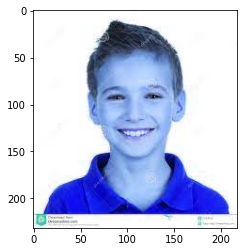

In [ ]:
plt.imshow(img) #BGR - blue,green,red

In [ ]:
# Analyze Image using DeepFace

from deepface import DeepFace

Directory  /root /.deepface created
Directory  /root /.deepface/weights created


In [ ]:
 prediction = DeepFace.analyze(img)

facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5
100%|██████████| 5.98M/5.98M [00:00<00:00, 71.4MB/s]


age_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: /root/.deepface/weights/age_model_weights.h5
100%|██████████| 539M/539M [00:06<00:00, 87.3MB/s]


gender_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: /root/.deepface/weights/gender_model_weights.h5
100%|██████████| 537M/537M [00:05<00:00, 101MB/s] 


race_model_single_batch.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/race_model_single_batch.h5
To: /root/.deepface/weights/race_model_single_batch.h5
100%|██████████| 537M/537M [00:06<00:00, 88.5MB/s]
Action: race: 100%|██████████| 4/4 [00:03<00:00,  1.05it/s]


In [ ]:
prediction['dominant_emotion']

'happy'

In [ ]:
# Trying to draw rectangle across the face(inorder to show where the face is)
# Haarcascade is face recgonitation algorythm used for face detection

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [ ]:
# GRAY MEANS YOU HAVE ONLY ONE CHANNEL, RGHB HAVE THREE CHANNEL
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = faceCascade.detectMultiScale(gray,1.1,4)

# Draw rectangle around the faces
# for x,y,w,h can detect multiple faces
# (0,255,0) is RGB means red is 0, green is 255, blue is 0, so the color of rectangle will be in green

for(x,y,w,h) in faces:
  cv2.rectangle(img,(x,y), (x+w, y+h), (0,255,0),2)

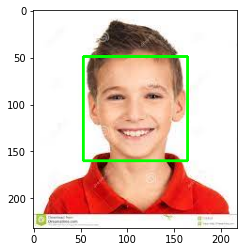

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
# font type
font = cv2.FONT_HERSHEY_SIMPLEX
# Use putText() method for inserting text on video

cv2.putText(img,
            prediction['dominant_emotion'],
            (0,50), font, 1,
            (0,0,255),2
            ,cv2.LINE_4)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[246, 255, 254],
        [243, 255, 254],
        [204, 226, 221],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[231, 232, 230],
        [255, 255, 254],
        [255, 255, 254],
        ...,
        [251, 251, 251],
        [248, 248, 248],
        [255, 255, 255]],

       [[255, 255, 254],
        [247, 239, 239],
        [255, 253, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

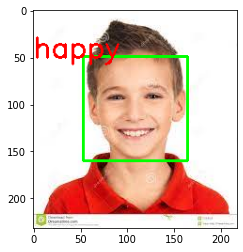

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))